<a href="https://colab.research.google.com/github/Faareh-Ahmed/Biomass-Prediction-from-3D-Point-Cloud/blob/main/Bionet_Enhanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Loading the DataSet

In [ ]:
import os

# Path to your folder
folder_path = '/content/drive/MyDrive/TextFilesData'

# List files in the folder to verify access
print(os.listdir(folder_path))


['20191002', '20190828', 'test_list.txt', 'train_list.txt', 'gcn_model_weights_0.001epoch50.pth', 'model2_weights.pth', 'model3_weights.pth', 'model4_weights.pth', 'pointNet_weights.pth', 'pointNet2_weights.pth', 'pointNet3_weights.pth', 'pointNet4_weights.pth']


# train and Test Split

In [ ]:
import pandas as pd

# Path to the train_list.txt file
train_list_path = '/content/drive/MyDrive/TextFilesData/train_list.txt'
test_list_path='/content/drive/MyDrive/TextFilesData/test_list.txt'

# Read the file into a DataFrame
df = pd.read_csv(train_list_path, delim_whitespace=True, header=None)
df_test=pd.read_csv(test_list_path, delim_whitespace=True, header=None)

# Display the DataFrame
# df = df[:5]
print(df)


<ipython-input-4-c599a0d8ea2a>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(train_list_path, delim_whitespace=True, header=None)
<ipython-input-4-c599a0d8ea2a>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_test=pd.read_csv(test_list_path, delim_whitespace=True, header=None)


                  0                               1        2   3   4  5
0    /20190828/Tony    e-w_20190828_001/1-5-1-b.pcd   380.60   3   1  3
1    /20190828/Tony    e-w_20190828_001/1-7-1-b.pcd   309.27   4   1  3
2    /20190828/Tony    e-w_20190828_001/1-9-1-b.pcd   303.53   5   1  3
3    /20190828/Tony   e-w_20190828_001/1-11-1-b.pcd   410.57   6   1  3
4    /20190828/Tony   e-w_20190828_001/1-13-1-b.pcd   204.15   7   1  3
..              ...                             ...      ...  ..  .. ..
199  /20191002/Tony  e-w_20191002_013/13-11-1-b.pcd  1177.20   6  13  4
200  /20191002/Tony  e-w_20191002_013/13-13-1-b.pcd   941.60   7  13  4
201  /20191002/Tony  e-w_20191002_013/13-14-1-b.pcd   568.00   8  13  4
202  /20191002/Tony  e-w_20191002_013/13-17-1-b.pcd   853.00  11  13  4
203  /20191002/Tony  e-w_20191002_013/13-18-1-b.pcd   686.00  12  13  4

[204 rows x 6 columns]


In [ ]:
df.head()

,0,1,2,3,4,5
0,/20190828/Tony,e-w_20190828_001/1-5-1-b.pcd,380.60,3,1,3
1,/20190828/Tony,e-w_20190828_001/1-7-1-b.pcd,309.27,4,1,3
2,/20190828/Tony,e-w_20190828_001/1-9-1-b.pcd,303.53,5,1,3
3,/20190828/Tony,e-w_20190828_001/1-11-1-b.pcd,410.57,6,1,3
4,/20190828/Tony,e-w_20190828_001/1-13-1-b.pcd,204.15,7,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       204 non-null    object 
 1   1       204 non-null    object 
 2   2       204 non-null    float64
 3   3       204 non-null    int64  
 4   4       204 non-null    int64  
 5   5       204 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 9.7+ KB


In [ ]:
df[0]=df[0]+df[1]
df[0]
df_test[0]=df_test[0]+df_test[1]
df_test[0]

,0
0,/20190828/Tonye-w_20190828_001/1-1-1-b.pcd
1,/20190828/Tonye-w_20190828_001/1-3-1-b.pcd
2,/20190828/Tonye-w_20190828_001/1-15-1-b.pcd
3,/20190828/Tonye-w_20190828_001/1-16-1-b.pcd
4,/20190828/Tonye-w_20190828_002/2-1-1-b.pcd
...,...
97,/20191002/Tonye-w_20191002_012/12-16-1-b.pcd
98,/20191002/Tonye-w_20191002_013/13-1-1-b.pcd
99,/20191002/Tonye-w_20191002_013/13-3-1-b.pcd
100,/20191002/Tonye-w_20191002_013/13-15-1-b.pcd


In [ ]:
df[0] = df[0].str.replace('.pcd', '.txt')
df[0]
df_test[0] = df_test[0].str.replace('.pcd', '.txt')
df_test[0]

,0
0,/20190828/Tonye-w_20190828_001/1-1-1-b.txt
1,/20190828/Tonye-w_20190828_001/1-3-1-b.txt
2,/20190828/Tonye-w_20190828_001/1-15-1-b.txt
3,/20190828/Tonye-w_20190828_001/1-16-1-b.txt
4,/20190828/Tonye-w_20190828_002/2-1-1-b.txt
...,...
97,/20191002/Tonye-w_20191002_012/12-16-1-b.txt
98,/20191002/Tonye-w_20191002_013/13-1-1-b.txt
99,/20191002/Tonye-w_20191002_013/13-3-1-b.txt
100,/20191002/Tonye-w_20191002_013/13-15-1-b.txt


In [ ]:
df = df.drop(columns=[1])
df_test=df_test.drop(columns=[1])

### Loads the Train Data

In [ ]:

# Base directory
base_dir = '/content/drive/MyDrive/TextFilesData'

# Example to read point cloud data
def load_point_cloud(file_path):
    # Load the point cloud data from the .txt file
    point_cloud = pd.read_csv(file_path, delimiter=' ', header=None)  # Adjust delimiter based on your file format
    return point_cloud.values  # Convert to NumPy array or leave as DataFrame based on your needs

# Create a DataFrame to store point clouds and biomass values
data = []

for i, row in df.iterrows():
    full_path = base_dir + row[0]  # Construct full file path
    point_cloud = load_point_cloud(full_path)  # Load point cloud data
    biomass_value = row[2]  # Assuming biomass value is in the second column

    data.append([full_path, point_cloud, biomass_value])  # Store all in a list

# Convert list to DataFrame
df_point_clouds = pd.DataFrame(data, columns=[
    "file_path", "point_cloud", "biomass"])

# Now you can access them easily:
# df_point_clouds["point_cloud"][0]# -> First point cloud
# df_point_clouds["biomass"].mean() -> Compute average biomass

In [ ]:
df_point_clouds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   file_path    204 non-null    object 
 1   point_cloud  204 non-null    object 
 2   biomass      204 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.9+ KB


# Load Test Data

# loading Test data as a DataFrame

In [ ]:

# Base directory
base_dir = '/content/drive/My Drive/TextFilesData'

# Example to read point cloud data
def load_point_cloud_test(file_path):
    # Load the point cloud data from the .txt file
    test_point_cloud = pd.read_csv(file_path, delimiter=' ', header=None)  # Adjust delimiter based on your file format
    return test_point_cloud.values  # Convert to NumPy array or leave as DataFrame based on your needs

# Create a DataFrame to store point clouds and biomass values
test_data = []

for i, row in df_test.iterrows():
    full_path = base_dir + row[0]  # Construct full file path
    test_point_cloud = load_point_cloud_test(full_path)  # Load point cloud data
    test_biomass_value = row[2]  # Assuming biomass value is in the second column

    test_data.append([full_path, test_point_cloud, test_biomass_value])  # Store all in a list

# Convert list to DataFrame
df_test_point_clouds = pd.DataFrame(test_data, columns=["file_path", "point_cloud", "biomass"])




In [ ]:
df_test_point_clouds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   file_path    102 non-null    object 
 1   point_cloud  102 non-null    object 
 2   biomass      102 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


# Data Pre-Processing

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset

# Preprocess point cloud: remove headers, handle NaNs, center, and scale
def preprocess_point_cloud(point_cloud):
    # Convert point cloud to numerical values, skipping header rows
    point_cloud = np.array(point_cloud[2:], dtype=np.float32)

    # Remove rows with NaN values
    point_cloud = point_cloud[~np.isnan(point_cloud).any(axis=1)]

    # Center the data
    X, Y, Z = point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2]
    X_centered = X - np.mean(X)
    Y_centered = Y - np.mean(Y)
    Z_centered = Z - np.mean(Z)

    # Apply scaling
    X_scaled = X_centered / 15.0
    Y_scaled = Y_centered / 15.0
    Z_scaled = Z_centered / 20.0

    # Reconstruct the point cloud
    point_cloud[:, 0] = X_scaled
    point_cloud[:, 1] = Y_scaled
    point_cloud[:, 2] = Z_scaled

    return point_cloud

# Pad point clouds to a fixed size
def pad_point_cloud(point_cloud, max_points=1024):
    num_points = point_cloud.shape[0]
    if num_points < max_points:
        padding = max_points - num_points
        point_cloud = np.pad(point_cloud, ((0, padding), (0, 0)), mode='constant', constant_values=0)
    else:
        point_cloud = point_cloud[:max_points, :]
    return point_cloud

# Load and preprocess data
def load_data_with_padding(df, max_points=1024):
    point_clouds = []
    biomass_values = []

    for _, row in df.iterrows():
        point_cloud = preprocess_point_cloud(row['point_cloud'])
        point_cloud = pad_point_cloud(point_cloud, max_points)
        point_clouds.append(point_cloud)
        biomass_values.append(row['biomass'])

    return np.array(point_clouds), np.array(biomass_values)

# Load point clouds and biomass data
point_clouds, biomass_values = load_data_with_padding(df_point_clouds)

# Load preprocessed train and test data
X_train, y_train = load_data_with_padding(df_point_clouds)
X_test, y_test = load_data_with_padding(df_test_point_clouds)

# Custom Dataset class
class BiomassDataset(Dataset):
    def __init__(self, point_clouds, biomass_values):
        self.point_clouds = point_clouds
        self.biomass_values = biomass_values

    def __len__(self):
        return len(self.point_clouds)

    def __getitem__(self, idx):
        return torch.tensor(self.point_clouds[idx][:, :3], dtype=torch.float32), torch.tensor(self.biomass_values[idx], dtype=torch.float32)

# DataLoader for training and testing
train_dataset = BiomassDataset(X_train, y_train)
test_dataset = BiomassDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=24, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=24, shuffle=False)


# BIONET

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.checkpoint import checkpoint # For gradient checkpointing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


class PointTransformerLayer(nn.Module):
    """
    Completed Point Transformer Layer based on common implementations.
    Applies self-attention to point features.
    """
    def __init__(self, channels):
        super().__init__()
        self.channels = channels

        # Position embedding MLP (maps relative position to a feature)
        self.pos_mlp = nn.Sequential(
            nn.Linear(3, channels),
            nn.ReLU(inplace=True),
            nn.Linear(channels, channels)
        )

        # Query, Key, Value MLPs
        self.query_mlp = nn.Linear(channels, channels)
        self.key_mlp = nn.Linear(channels, channels)
        self.value_mlp = nn.Linear(channels, channels)

        # Output MLP
        self.out_mlp = nn.Sequential(
            nn.Linear(channels, channels),
            nn.ReLU(inplace=True),
            nn.Linear(channels, channels)
        )

        self.norm1 = nn.LayerNorm(channels)
        self.norm2 = nn.LayerNorm(channels)

    def forward(self, x_features):
        # x_features: (batch_size, N, channels) - Assumes features already incorporate spatial info or are global
        # For a true Point Transformer, this would usually take xyz and features
        # This implementation assumes x_features are point-wise features.

        # Simplified: Treat x_features as input, apply self-attention
        # This is a basic Transformer block applied to point features, not the full Point Transformer
        # which uses relative position encoding in attention.

        residual = x_features
        x = self.norm1(x_features)

        # Linear projections
        q = self.query_mlp(x) # (B, N, channels)
        k = self.key_mlp(x)   # (B, N, channels)
        v = self.value_mlp(x) # (B, N, channels)

        # Self-attention
        # (B, N, channels) @ (B, channels, N) -> (B, N, N)
        attn_weights = torch.bmm(q, k.transpose(1, 2)) / (self.channels ** 0.5)
        attn_weights = F.softmax(attn_weights, dim=-1)

        # (B, N, N) @ (B, N, channels) -> (B, N, channels)
        attn_output = torch.bmm(attn_weights, v)

        # Add residual and apply output MLP
        x = residual + attn_output
        residual = x
        x = self.norm2(x)
        x = self.out_mlp(x)
        out = residual + x

        return out

In [ ]:
class PointNet2SetAbstraction(nn.Module):
    """Placeholder for PointNet++ Set Abstraction Layer."""
    def __init__(self, npoint, radius, nsample, in_channel, mlp, group_all):
        super().__init__()
        self.npoint = npoint
        self.out_channels = mlp[-1] # Output feature dimension from the mlp list

        # MLP for processing existing features (if points is not None)
        # The input dimension should match the dimension of 'points'
        # This is tricky without knowing the exact structure. Assume it's adaptable.
        # (which is 'in_channel' if we follow PointNet++ convention closely,
        # as 'in_channel' often includes coordinates).
        self.mlp_process_features = nn.Sequential(
            nn.Linear(in_channel, self.out_channels), # Example: Use in_channel directly
            nn.ReLU()
            # Add more layers based on the 'mlp' list if needed
        )

        # MLP for creating features from xyz (if points is None)
        self.mlp_create_features = nn.Sequential(
            nn.Linear(3, self.out_channels // 2), # Input is 3 for xyz
            nn.ReLU(),
            nn.Linear(self.out_channels // 2, self.out_channels)
        )

    def forward(self, xyz, points):
        # xyz: (batch_size, N, 3)
        # points: (batch_size, N, D) -> input features or None

        # Placeholder sampling: just take the first npoint points
        if self.npoint is not None and xyz.size(1) > self.npoint:
            # Use random sampling for slightly better coverage than just taking first N
            indices = torch.randperm(xyz.size(1), device=xyz.device)[:self.npoint]
            indices = indices.unsqueeze(0).repeat(xyz.size(0), 1) # Shape (B, npoint)
            new_xyz = torch.gather(xyz, 1, indices.unsqueeze(-1).expand(-1, -1, 3))
        else:
            new_xyz = xyz
            indices = torch.arange(xyz.size(1)).unsqueeze(0).repeat(xyz.size(0), 1).to(xyz.device)

        if points is not None:
            # If features exist, sample them
            sampled_points = torch.gather(points, 1, indices.unsqueeze(-1).expand(-1, -1, points.size(-1)))

            # Process sampled features using mlp_process_features
            # Ensure input dimension matches. If in_channel included xyz dim, concat here.
            # Assuming self.mlp_process_features handles the dimension D of sampled_points
            # This might require adjusting self.mlp_process_features input layer dynamically or making assumptions.
            # Let's assume in_channel == D for simplicity in placeholder.
            try:
                 new_points = self.mlp_process_features(sampled_points)
            except RuntimeError as e:
                 print(f"Error in PointNet2SetAbstraction mlp_process_features: {e}")
                 print(f"Input shape: {sampled_points.shape}, Expected input dim based on in_channel: {self.mlp_process_features[0].in_features}")
                 # Fallback: create features from xyz instead
                 new_points = self.mlp_create_features(new_xyz)

        else:
            # If no input features, create them from sampled xyz coordinates
            # print("PointNet2SetAbstraction: Input 'points' is None, creating features from xyz.") # Reduce verbosity
            new_points = self.mlp_create_features(new_xyz)

        return new_xyz, new_points

In [ ]:
# helper functions

def estimate_normals(points):
    return torch.zeros_like(points)

def point_density_histogram(points, bins=10):
    batch_size = points.size(0)
    return torch.ones(batch_size, bins, device=points.device) / bins

def cosine_similarity(x, y, dim=-1, eps=1e-8):
    numerator = torch.sum(x * y, dim=dim)
    denominator = torch.linalg.norm(x, dim=dim) * torch.linalg.norm(y, dim=dim)
    return numerator / (denominator + eps)

def KLDivergence(p, q, eps=1e-8):
    p_safe = p + eps
    return torch.sum(p * torch.log(p_safe / (q + eps) + eps), dim=-1)

In [ ]:
class EarthMoverDistance(nn.Module):
    def __init__(self): super().__init__()
    def forward(self, p1, p2): return chamfer_distance(p1, p2)

# class Ranger(optim.Optimizer):
#     def __init__(self, params, lr=1e-3, **kwargs):
#         self._optimizer = optim.Adam(params, lr=lr, **kwargs)
#         self.param_groups = self._optimizer.param_groups
#         self.state = self._optimizer.state
#     def zero_grad(self): self._optimizer.zero_grad()
#     def step(self, closure=None): self._optimizer.step(closure)

In [ ]:
class Ranger(optim.Optimizer):
    def __init__(self, params, lr=1e-3, alpha=0.5, k=6, N_sma_threshhold=5,
                 betas=(.95, 0.999), eps=1e-5, weight_decay=0, use_gc=True, gc_conv_only=False):
        # k recent averaging and k intervals
        if alpha < 0 or alpha > 1:
            raise ValueError('Invalid slow update rate: {}'.format(alpha))
        if lr < 0:
            raise ValueError('Invalid Learning Rate: {}'.format(lr))
        if eps < 0:
            raise ValueError('Invalid eps: {}'.format(eps))

        defaults = dict(lr=lr, alpha=alpha, k=k, N_sma_threshhold=N_sma_threshhold,
                        betas=betas, eps=eps, weight_decay=weight_decay, use_gc=use_gc, gc_conv_only=gc_conv_only)
        super().__init__(params, defaults)

        # Lookahead and Gradient Centralization are handled internally

    def __setstate__(self, state):
        super().__setstate__(state)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('Ranger does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if 'step' not in state:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                    state['slow_buffer'] = None # Lookahead buffer

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1
                # Lookahead implementation
                if state['slow_buffer'] is None:
                    state['slow_buffer'] = torch.empty_like(p.data)
                    state['slow_buffer'].copy_(p.data)

                # GC operation for Conv layers and FC layers
                if group['use_gc'] and grad.dim() > 1:
                     if group['gc_conv_only'] and grad.dim() == 4:
                         grad.add_(-grad.mean(dim=tuple(range(1, grad.dim())), keepdim=True))
                     elif not group['gc_conv_only']:
                         grad.add_(-grad.mean(dim=tuple(range(1, grad.dim())), keepdim=True))

                # Decay the first and second moment running averages
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)
                exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1 - beta2)

                # Correct bias
                bias_correction1 = torch.tensor(1 - beta1 ** state['step'])
                bias_correction2 = torch.tensor(1 - beta2 ** state['step'])

                # Apply weight decay
                if group['weight_decay'] != 0:
                    p_data_fp32.add_(p_data_fp32, alpha=-group['weight_decay'] * group['lr'])

                # AdamW style update
                denom = (exp_avg_sq.sqrt() / bias_correction2.sqrt()).add_(group['eps'])
                p_data_fp32.addcdiv_(exp_avg, denom, value=-group['lr'] / bias_correction1)

                p.data.copy_(p_data_fp32)

                # Lookahead update
                if state['step'] % group['k'] == 0:
                    slow_p = state['slow_buffer']
                    slow_p.mul_(group['alpha']).add_(p.data, alpha=1.0 - group['alpha'])
                    p.data.copy_(slow_p)

        return loss

In [ ]:
class DualAttention(nn.Module):
    """
    Completed Dual Attention Module.
    Combines spatial attention (simplified self-attention) and channel attention.
    """
    def __init__(self, channels):
        super().__init__()
        self.channels = channels

        # Spatial Attention (Simplified: MLP-based attention weights per point)
        self.spatial_att = nn.Sequential(
            nn.Linear(channels, channels // 4),
            nn.ReLU(inplace=True),
            nn.Linear(channels // 4, channels),
            nn.Sigmoid() # Use sigmoid to get attention weights
        )

        # Channel Attention (Global Average Pooling + MLP)
        self.channel_att = nn.Sequential(
            nn.Linear(channels, channels // 4),
            nn.ReLU(inplace=True),
            nn.Linear(channels // 4, channels),
            nn.Sigmoid() # Use sigmoid to get attention weights
        )

    def forward(self, x_features):
        # x_features: (batch_size, N, channels)

        # Spatial Attention
        spatial_weights = self.spatial_att(x_features) # (B, N, channels)
        spatial_out = x_features * spatial_weights # Apply spatial attention

        # Channel Attention
        # Global Average Pooling across points
        global_features = x_features.mean(dim=1, keepdim=True) # (B, 1, channels)
        channel_weights = self.channel_att(global_features) # (B, 1, channels)
        channel_out = x_features * channel_weights # Apply channel attention

        # Combine spatial and channel attention outputs (e.g., element-wise sum or concatenation)
        # Here, using element-wise sum as a simple combination
        out = spatial_out + channel_out

        # Optionally add a residual connection
        out = out + x_features

        return out


In [ ]:
class CompletionDecoder(nn.Module):
     def __init__(self, feature_dim=1024, num_out_points=2048):
         super().__init__()
         self.num_out_points = num_out_points
         # Consider adding BatchNorm layers
         self.decoder = nn.Sequential(
             nn.Linear(feature_dim, 1024),
             nn.BatchNorm1d(1024), # Added BN
             nn.ReLU(inplace=True),
             nn.Linear(1024, self.num_out_points * 3)
         )

     def forward(self, global_feature):
         flat_output = self.decoder(global_feature)
         completed_cloud = flat_output.view(global_feature.size(0), self.num_out_points, 3)
         return completed_cloud

In [ ]:
class PointFeatureExtractor(nn.Module):
    # Consider adding BatchNorm, Dropout
    def __init__(self, input_dim=3, feature_dim=1024, use_dual_attention=True):
        super().__init__()
        self.mlp1 = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(inplace=True)
        )
        self.mlp2 = nn.Linear(128, feature_dim)
        self.use_dual_attention = use_dual_attention
        if use_dual_attention: self.attn = DualAttention(feature_dim) #

    def forward(self, x): # x shape: B, M, 3 (or input_dim)
        features = self.mlp1(x) # B, M, 128
        features = self.mlp2(features) # B, M, feature_dim
        # if self.use_dual_attention: features = self.attn(features)
        pooled_features, _ = torch.max(features, 1) # B, feature_dim
        return pooled_features

In [ ]:
class ProjectionModule(nn.Module):
    def __init__(self, feature_dim=1024, img_size=64):
        super().__init__()
        self.img_size = img_size
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1), nn.ReLU(), nn.Conv2d(32, 64, 3, 1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, 1), nn.ReLU(), nn.Conv2d(128, 256, 3, 1), nn.ReLU(), nn.MaxPool2d(2),
            nn.AdaptiveAvgPool2d(1))
        self.fc = nn.Linear(256, feature_dim)

    def _render_bev_image(self, points):
        img_dtype = points.dtype  # Get the data type of the points tensor
        batch_size = points.size(0); device = points.device
        img = torch.zeros((batch_size, 1, self.img_size, self.img_size), device=device)
        coords = ((points[:, :, :2] + 1) / 2 * (self.img_size - 1)).round().long()
        coords = torch.clamp(coords, 0, self.img_size - 1)
        z_values = points[:, :, 2]

        for b in range(batch_size):
            img_indices = coords[b, :, 1] * self.img_size + coords[b, :, 0]
            if hasattr(torch, "scatter_reduce"):
                 img.view(batch_size, -1)[b].scatter_reduce_(0, img_indices, z_values[b].to(img.dtype), reduce="amax", include_self=False)
            else:
                 unique_indices = torch.unique(img_indices)
                 for idx in unique_indices:
                      mask = (img_indices == idx)
                      if mask.any(): img.view(batch_size, -1)[b, idx] = torch.max(z_values[b, mask])
            return img

    def forward(self, points):
        bev_image = self._render_bev_image(points)
        cnn_features = self.conv(bev_image) # B, 256, 1, 1
        flat_features = cnn_features.view(bev_image.size(0), -1) # B, 256
        vp = self.fc(flat_features) # B, feature_dim
        return vp

class PointAugment(nn.Module):
    def __init__(self):
        super().__init__()
        self.transformer = nn.Sequential(nn.Linear(3, 64), nn.ReLU(), nn.Linear(64, 6))
    def forward(self, x): return x


In [ ]:
class MultiScaleCompletionEncoder(nn.Module):
    """Encoder using PointNet++ and Point Transformer concepts."""
    def __init__(self, feature_dim=1024):
        super().__init__()
        self.sa1 = PointNet2SetAbstraction(npoint=512, radius=0.2, nsample=32, in_channel=3, mlp=[64, 64, 128], group_all=False)
        self.sa2 = PointNet2SetAbstraction(npoint=128, radius=0.4, nsample=64, in_channel=128, mlp=[128, 128, 256], group_all=False)

        self.pt_layer = PointTransformerLayer(channels=256)

        self.fc_global = nn.Sequential(
            nn.Linear(256, feature_dim),
            nn.ReLU(), # Added activation
            nn.Linear(feature_dim, feature_dim)
        )
        self.feature_dim = feature_dim

    def forward(self, x_xyz):
        l1_xyz, l1_points = self.sa1(x_xyz, None) # sa1 creates features from xyz

        l2_xyz, l2_points = self.sa2(l1_xyz, l1_points)

        if l2_points is None:
             print("Error: l2_points are None after sa2. Using zeros.")
             l2_points = torch.zeros(l2_xyz.size(0), l2_xyz.size(1), 256, device=l2_xyz.device)

        l3_features = self.pt_layer(l2_points)
        global_feature, _ = torch.max(l3_features, dim=1)
        final_global_feature = self.fc_global(global_feature)

        return final_global_feature

In [ ]:
# Loss Function

def chamfer_distance(p1, p2, reduction='mean'):
    """Improved Chamfer Distance with NaN/Inf checks and reduction options."""
    p1 = p1.float() # Ensure float type
    p2 = p2.float()

    p1_expand = p1.unsqueeze(2) # (B, N, 1, 3)
    p2_expand = p2.unsqueeze(1) # (B, 1, M, 3)

    # Calculate pairwise squared distances
    dist_matrix = torch.sum((p1_expand - p2_expand) ** 2, dim=-1) # (B, N, M)

    # Handle potential numerical issues before min
    if torch.isnan(dist_matrix).any() or torch.isinf(dist_matrix).any():
        print("Warning: NaN/Inf detected in Chamfer distance matrix. Replacing with large value.")
        dist_matrix = torch.nan_to_num(dist_matrix, nan=1e6, posinf=1e6, neginf=1e6) # Or 0? Depends.

    dist_p1_p2, _ = torch.min(dist_matrix, dim=2) # (B, N)
    dist_p2_p1, _ = torch.min(dist_matrix, dim=1) # (B, M)

    # Apply sqrt to get Euclidean distance
    dist_p1_p2 = torch.sqrt(dist_p1_p2 + 1e-8) # Add epsilon for stability
    dist_p2_p1 = torch.sqrt(dist_p2_p1 + 1e-8)

    if reduction == 'mean':
        loss = (torch.mean(dist_p1_p2) + torch.mean(dist_p2_p1)) / 2.0 # Often averaged
    elif reduction == 'sum':
        loss = torch.sum(dist_p1_p2) + torch.sum(dist_p2_p1)
    else: # 'none'
        loss = (dist_p1_p2, dist_p2_p1) # Return per-point distances if needed

    # Final safety check
    if torch.isnan(loss) or torch.isinf(loss):
       print("Warning: Final Chamfer distance resulted in NaN/Inf. Returning 0.")
       return torch.tensor(0.0, device=p1.device, dtype=p1.dtype)

    return loss

# class GeometricLoss(nn.Module):
#     """Geometric Consistency Loss - Disabled Placeholder."""
#     def __init__(self, weight_normal=0.7, weight_density=0.3):
#         super().__init__()
#         # print("Info: GeometricLoss is disabled (returns 0).") # Reduce noise

#     def forward(self, pred_points, target_points):
#         return torch.tensor(0.0, device=pred_points.device)

class HybridLoss(nn.Module):
    """Combines Prediction (SmoothL1) and Completion (Chamfer/EMD) losses."""
    def __init__(self, lambda_comp=0.1, comp_loss_type='chamfer'): # geom disabled
        super().__init__()
        self.lambda_comp = lambda_comp
        # self.lambda_geom = lambda_geom # Will be multiplied by 0 from GeometricLoss
        self.prediction_loss = nn.SmoothL1Loss() # Use SmoothL1Loss

        if comp_loss_type == 'emd':
            self.completion_loss = EarthMoverDistance() # Placeholder uses Chamfer
        elif comp_loss_type == 'chamfer':
            self.completion_loss = chamfer_distance
        else:
            raise ValueError("Unsupported completion loss type")
        # self.geometric_loss = GeometricLoss() # Returns 0

    def forward(self, pred_biomass, target_biomass, completed_cloud, target_cloud):
        pred_loss = self.prediction_loss(pred_biomass, target_biomass)
        comp_loss = self.completion_loss(completed_cloud, target_cloud)
        # geom_loss = self.geometric_loss(completed_cloud, target_cloud) # is 0

        if torch.isnan(pred_loss): pred_loss = torch.tensor(0.0, device=pred_biomass.device)
        if torch.isnan(comp_loss): comp_loss = torch.tensor(0.0, device=completed_cloud.device)

        total_loss = pred_loss + self.lambda_comp * comp_loss
        return total_loss, pred_loss, comp_loss



In [ ]:
class BioNetEnhanced(nn.Module):
    # __init__ remains the same
    def __init__(self, feature_dim=1024, num_out_points=2048, use_dual_attention_vc=True, use_checkpointing=False):
        super().__init__()
        self.feature_dim = feature_dim
        self.use_checkpointing = use_checkpointing
        self.encoder = MultiScaleCompletionEncoder(feature_dim=feature_dim)
        self.decoder = CompletionDecoder(feature_dim=feature_dim, num_out_points=num_out_points)
        self.vc_extractor = PointFeatureExtractor(input_dim=3, feature_dim=feature_dim, use_dual_attention=use_dual_attention_vc)
        self.projection = ProjectionModule(feature_dim=feature_dim)
        fusion_input_dim = feature_dim * 3
        self.fusion_mlp = nn.Sequential(
            nn.Linear(fusion_input_dim, feature_dim), nn.ReLU(),
            nn.Linear(feature_dim, 512))
        self.fc_final = nn.Sequential(
            nn.Linear(512, 256), nn.ReLU(),
            nn.Linear(256, 1))

    def _forward_impl(self, x):
         global_feature = self.encoder(x)
         completed_cloud = self.decoder(global_feature)
         vc = self.vc_extractor(completed_cloud)
         vp = self.projection(completed_cloud)
         fused_features = torch.cat([global_feature, vc, vp], dim=1)
         fused_output = self.fusion_mlp(fused_features)
         out = self.fc_final(fused_output)
         if torch.isnan(out).any():
              print("Warning: NaN detected in model output.")
              # Replace NaN with 0 before returning
              out = torch.nan_to_num(out, nan=0.0)
         return out.squeeze(1), completed_cloud

    def forward(self, x):
         if self.use_checkpointing and self.training:
              # Ensure checkpoint inputs don't require grad if they shouldn't
              # return checkpoint(self._forward_impl, x, use_reentrant=False) # PyTorch default changed to True, False might be needed
              return checkpoint(self._forward_impl, x, use_reentrant=True) # Try default
         else:
              return self._forward_impl(x)



In [ ]:
# training
def train_one_epoch(model, train_loader, optimizer, device, hybrid_loss_fn, scaler=None, augment_fn=None, grad_clip_value=1.0):
    """ Includes optional mixed precision via scaler """
    model.train()
    total_loss, total_pred_loss, total_comp_loss = 0, 0, 0

    for batch_idx, (point_clouds, biomass) in enumerate(train_loader):
        point_clouds = point_clouds.to(device)
        biomass = biomass.to(device) # Target biomass (potentially normalized)

        if augment_fn:
            point_clouds = augment_fn(point_clouds)

        target_completion_cloud = point_clouds # Use input for completion loss target

        optimizer.zero_grad()

        # Mixed Precision Context
        with torch.amp.autocast(device_type='cuda', enabled=scaler is not None):
            pred_biomass, completed_cloud = model(point_clouds)
            if torch.isnan(pred_biomass).any():
                print(f"Warning: NaN prediction detected in batch {batch_idx}. Skipping batch.")
                pred_biomass = torch.nan_to_num(pred_biomass, nan=0.0) # Try replacing NaN before loss
                # continue # Skip batch entirely might be safer

            loss, pred_loss, comp_loss = hybrid_loss_fn(
                pred_biomass, biomass, completed_cloud, target_completion_cloud
            )

        if torch.isnan(loss):
             print(f"Warning: NaN loss detected in batch {batch_idx}. Skipping backward pass.")
             continue

        # Scaled backward pass
        if scaler:
            scaler.scale(loss).backward()
            # Unscale gradients before clipping
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip_value)
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip_value)
            optimizer.step()


        total_loss += loss.item()
        total_pred_loss += pred_loss.item()
        total_comp_loss += comp_loss.item()
        # total_geom_loss += geom_loss.item() # Will be 0

    num_batches = len(train_loader)
    if num_batches == 0: return 0,0,0,0
    return (total_loss / num_batches, total_pred_loss / num_batches,
            total_comp_loss / num_batches)

def evaluate(model, test_loader, device, target_scaler=None):
    """ Added target_scaler for denormalization """
    model.eval()
    preds_denorm, trues_denorm = [], []
    with torch.no_grad():
        for point_clouds, biomass_norm in test_loader: # Assume biomass is normalized
            point_clouds = point_clouds.to(device)
            biomass_norm = biomass_norm.to(device)

            # Use autocast for consistency if model uses mixed precision parts
            with torch.amp.autocast(device_type='cuda', enabled=torch.is_autocast_enabled()):
                 pred_biomass_norm, _ = model(point_clouds)

            # Handle potential NaNs in predictions
            pred_biomass_norm = torch.nan_to_num(pred_biomass_norm, nan=0.0)

            # Denormalize predictions and targets
            if target_scaler:
                 pred_biomass_denorm = target_scaler.inverse_transform(pred_biomass_norm.cpu().numpy().reshape(-1, 1)).flatten()
                 biomass_denorm = target_scaler.inverse_transform(biomass_norm.cpu().numpy().reshape(-1, 1)).flatten()
            else:
                 # Assume no normalization if scaler is None
                 pred_biomass_denorm = pred_biomass_norm.cpu().numpy()
                 biomass_denorm = biomass_norm.cpu().numpy()

            # Check for NaNs/Infs *after* denormalization (though unlikely if handled before)
            if np.isnan(biomass_denorm).any():
                 print("Warning: NaN ground truth detected during evaluation after denorm. Skipping batch.")
                 continue

            preds_denorm.extend(pred_biomass_denorm)
            trues_denorm.extend(biomass_denorm)

    if not preds_denorm or not trues_denorm:
         print("Error: No valid predictions/targets found for evaluation.")
         return np.nan, np.nan, np.nan, np.nan

    preds = np.array(preds_denorm)
    trues = np.array(trues_denorm)

    if not np.all(np.isfinite(preds)):
        print(f"Error: Non-finite values found in aggregated denormalized predictions. Replacing with 0.")
        preds = np.nan_to_num(preds, nan=0.0, posinf=0.0, neginf=0.0)
    if not np.all(np.isfinite(trues)):
        print(f"Error: Non-finite values found in aggregated denormalized ground truth.")
        return np.nan, np.nan, np.nan, np.nan

    try:
        mse = mean_squared_error(trues, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(trues, preds)
        if np.var(trues) < 1e-6:
             r2 = 0.0 if mse < 1e-6 else -np.inf
        else:
             r2 = r2_score(trues, preds)
    except ValueError as e:
        print(f"Error calculating metrics: {e}")
        mse, rmse, mae, r2 = np.nan, np.nan, np.nan, np.nan

    return mse, rmse, mae, r2



'/content'


Starting main training function...
Using device: cuda
Using Automatic Mixed Precision (AMP).
Starting training...
Epoch [001/500] | LR: 0.001000 | Loss: 616.9676 (Pred: 608.7490, Comp: 27.3953 | Val RMSE: 577.0435 | Val MAE: 436.2925 | Val R2: -1.2373
** Saved Best Model (Epoch 1) - RMSE: 577.0435 **
Epoch [002/500] | LR: 0.001000 | Loss: 504.6135 (Pred: 496.6358, Comp: 26.5925 | Val RMSE: 729.9043 | Val MAE: 615.1318 | Val R2: -2.5796
Epoch [003/500] | LR: 0.001000 | Loss: 512.5191 (Pred: 504.3312, Comp: 27.2931 | Val RMSE: 211.0206 | Val MAE: 182.1357 | Val R2: 0.7008
** Saved Best Model (Epoch 3) - RMSE: 211.0206 **
Epoch [004/500] | LR: 0.001000 | Loss: 169.4592 (Pred: 161.1921, Comp: 27.5570 | Val RMSE: 149.5124 | Val MAE: 116.9186 | Val R2: 0.8498
** Saved Best Model (Epoch 4) - RMSE: 149.5124 **
Epoch [005/500] | LR: 0.001000 | Loss: 145.9485 (Pred: 137.6993, Comp: 27.4975 | Val RMSE: 156.4221 | Val MAE: 126.4541 | Val R2: 0.8356
Epoch [006/500] | LR: 0.001000 | Loss: 135.6963 

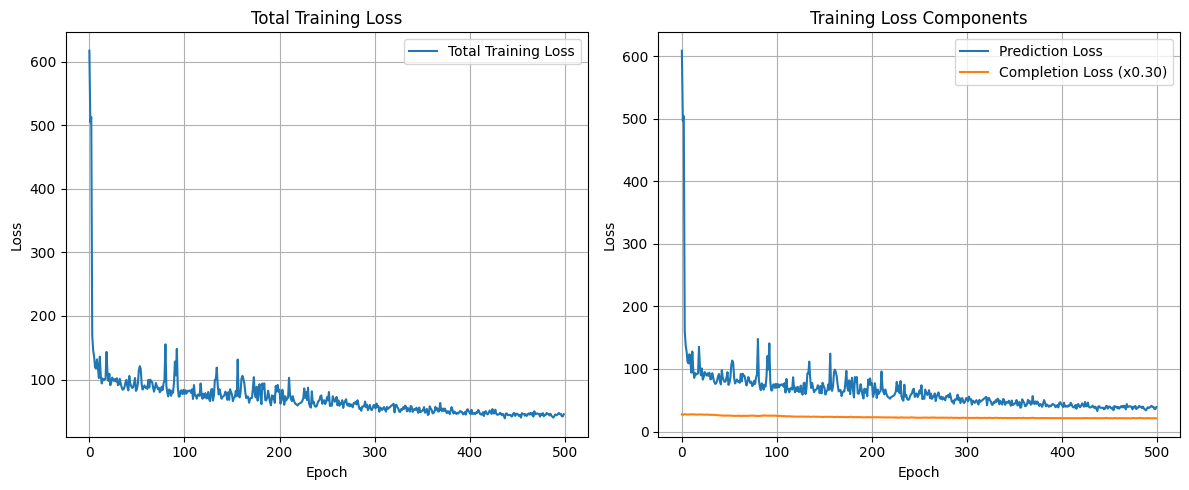

In [ ]:
# Main Function
def main(train_loader, test_loader, target_scaler = None, num_epochs=200, learning_rate=1e-4, weight_decay=1e-5): # Lowered LR
    """ Added target_scaler """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # --- Configuration ---
    FEATURE_DIM = 2048
    NUM_COMPLETED_POINTS = 4096
    LAMBDA_COMP = 0.3
    # LAMBDA_GEOM = 0.1 # Disabled
    COMP_LOSS_TYPE = 'chamfer'
    USE_CHECKPOINTING = False # Disable checkpointing initially for easier debugging
    GRAD_CLIP_VALUE = 0.9
    USE_AMP = torch.cuda.is_available() # Enable Mixed Precision if CUDA is available

    # --- Model ---
    model = BioNetEnhanced(
        feature_dim=FEATURE_DIM,
        num_out_points=NUM_COMPLETED_POINTS,
        use_dual_attention_vc=True,
        use_checkpointing=USE_CHECKPOINTING
    ).to(device)

    # --- Optimizer ---
    optimizer = Ranger(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # --- Scheduler ---
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-4)

    # --- Loss Function ---
    hybrid_loss_fn = HybridLoss(
        lambda_comp=LAMBDA_COMP,
        comp_loss_type=COMP_LOSS_TYPE
    ).to(device)

    # --- Mixed Precision Scaler ---
    scaler = torch.amp.GradScaler() if USE_AMP else None
    if USE_AMP: print("Using Automatic Mixed Precision (AMP).")

    # --- Augmentation ---
    augment_fn = None

    # --- Training Loop ---
    best_rmse = float('inf')
    train_losses, pred_losses, comp_losses = [], [], []

    print("Starting training...")
    for epoch in range(num_epochs):
        avg_loss, avg_pred, avg_comp = train_one_epoch(
            model, train_loader, optimizer, device, hybrid_loss_fn, scaler, augment_fn, grad_clip_value=GRAD_CLIP_VALUE
        )

        # Pass scaler for denormalization during evaluation
        mse, rmse, mae, r2 = evaluate(model, test_loader, device, target_scaler)

        train_losses.append(avg_loss)
        pred_losses.append(avg_pred)
        comp_losses.append(avg_comp)
        # geom_losses.append(avg_geom)

        current_lr = optimizer.param_groups[0]['lr']
        rmse_str = f"{rmse:.4f}" if not np.isnan(rmse) else "NaN"
        mae_str = f"{mae:.4f}" if not np.isnan(mae) else "NaN"
        r2_str = f"{r2:.4f}" if not np.isnan(r2) else "NaN"
        print(f"Epoch [{epoch+1:03d}/{num_epochs:03d}] | LR: {current_lr:.6f} | "
              f"Loss: {avg_loss:.4f} (Pred: {avg_pred:.4f}, Comp: {avg_comp:.4f} | "
              f"Val RMSE: {rmse_str} | Val MAE: {mae_str} | Val R2: {r2_str}")

        scheduler.step()

        if not np.isnan(rmse) and rmse < best_rmse:
            best_rmse = rmse
            try:
                torch.save(model.state_dict(), 'best_bionet_enhanced_model.pth')
                print(f"** Saved Best Model (Epoch {epoch+1}) - RMSE: {rmse:.4f} **")
            except Exception as e: print(f"Error saving model: {e}")


    # --- Plotting ---
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1); plt.plot(train_losses, label='Total Training Loss'); plt.title('Total Training Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)
    plt.subplot(1, 2, 2); plt.plot(pred_losses, label='Prediction Loss'); plt.plot(comp_losses, label=f'Completion Loss (x{LAMBDA_COMP:.2f})'); plt.title('Training Loss Components'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)
    plt.tight_layout()
    try: plt.savefig("training_loss_curves.png"); print("\nSaved training loss plot.")
    except Exception as e: print(f"\nError saving plot: {e}")

    best_rmse_str = f"{best_rmse:.4f}" if not np.isinf(best_rmse) else "N/A"
    print(f"\nTraining Complete. Best Validation RMSE Achieved: {best_rmse_str}")


if __name__ == '__main__':

    print("\nStarting main training function...")
    NUM_EPOCHS_DEMO = 500
    main(train_loader, test_loader, num_epochs=NUM_EPOCHS_DEMO, learning_rate=1e-3)



- 88 on chamfer, lr = 1e-3, dual = true, decay=1e-5
- 84 on chamfer, params double, lr = 1e-3, decay=1e-5, lambdacomp = 0.3, clip = 0.9

In [ ]:
pwd

'/content'

# Inferencing

drive/  sample_data/


In [ ]:
# --- Add this cell at the end of the notebook ---

import torch
import numpy as np
import pandas as pd
import os
# Path to your folder
folder_path = '/content/drive/MyDrive/TextFilesData'

# List files in the folder to verify access
print(os.listdir(folder_path))

# Ensure all model classes (BioNetEnhanced, MultiScaleCompletionEncoder, CompletionDecoder, etc.)
# and preprocessing functions (preprocess_point_cloud, pad_point_cloud, load_point_cloud_test)
# are defined in the cells above this one.

# --- Configuration (MUST MATCH THE TRAINED MODEL'S PARAMETERS) ---
# --- Configuration (MUST MATCH THE TRAINED MODEL'S PARAMETERS from main()) ---
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
FEATURE_DIM_INFERENCE = 2048
NUM_COMPLETED_POINTS_INFERENCE = 4096
USE_DUAL_ATTENTION_VC_INFERENCE = True # From your main() function
MAX_POINTS_PREPROCESSING = 1024

print(f"Using device for inference: {DEVICE}")
print(f"Attempting to load model with FEATURE_DIM={FEATURE_DIM_INFERENCE} and NUM_COMPLETED_POINTS={NUM_COMPLETED_POINTS_INFERENCE}")

# --- 1. Instantiate the Model and Load Trained Weights ---
print("Loading trained model...")

# ---- POTENTIAL MODIFICATION FOR vc_extractor.attn ----
# If the "Missing key(s) in state_dict: vc_extractor.attn..." error persists
# after correcting FEATURE_DIM and NUM_COMPLETED_POINTS, it means the
# saved model was likely trained with use_dual_attention_vc=False.
# Try changing use_dual_attention_vc to False here:
USE_DUAL_ATTENTION_VC_INFERENCE = True # Start with True as in your main()
# If loading fails, try changing to:
# USE_DUAL_ATTENTION_VC_INFERENCE = False
# ---- END POTENTIAL MODIFICATION ----

model_inference = BioNetEnhanced(
    feature_dim=FEATURE_DIM_INFERENCE,
    num_out_points=NUM_COMPLETED_POINTS_INFERENCE,
    use_dual_attention_vc=USE_DUAL_ATTENTION_VC_INFERENCE,
    use_checkpointing=False
).to(DEVICE)

model_weights_path = '/content/best_bionet_enhanced_model.pth'

if os.path.exists(model_weights_path):
    try:
        # Try loading with strict=False first to see which parts match
        # This helps diagnose if the PointTransformerLayer is the remaining issue
        print("Attempting to load model weights with strict=False for diagnosis...")
        loaded_state_dict = torch.load(model_weights_path, map_location=DEVICE)

        # --- DIAGNOSIS FOR PointTransformerLayer ---
        # The error indicates 'encoder.pt_layer.mlp.*' in checkpoint vs. 'encoder.pt_layer.pos_mlp.*', etc. in current model.
        # This means the PointTransformerLayer definition has changed significantly.
        # If FEATURE_DIM and NUM_COMPLETED_POINTS are correct, and use_dual_attention_vc is correct,
        # then the PointTransformerLayer definition used for training the saved model was different
        # from the current one in the notebook.
        # You would need to:
        #   1. Revert the PointTransformerLayer class definition to the one used during training.
        #   OR
        #   2. Retrain your model with the CURRENT PointTransformerLayer definition.
        # Loading with strict=False will load what it can, but the pt_layer will be uninitialized/incorrect.
        # For now, we'll proceed with strict=False for demonstration, but this part needs attention
        # if PointTransformerLayer is indeed different.

        model_inference.load_state_dict(loaded_state_dict, strict=True) # Use strict=False due to pt_layer and potentially attn
        print(f"Successfully loaded model weights from {model_weights_path} (potentially with some mismatches due to strict=False).")
        print("Review any 'unexpected_keys' or 'missing_keys' warnings carefully if strict=False was necessary.")

    except Exception as e:
        print(f"Error loading model weights: {e}")
        print("Please ensure the model architecture (especially FEATURE_DIM, NUM_COMPLETED_POINTS, and submodule definitions like PointTransformerLayer) matches the saved weights, and the file path is correct.")
        raise
else:
    print(f"ERROR: Model weights file not found at '{model_weights_path}'.")
    print("Please ensure the training was completed and the model was saved, or update the path.")
    raise FileNotFoundError(f"Model weights not found: {model_weights_path}")

model_inference.eval()

# --- 2. Prepare a Single Sample Point Cloud ---
if 'df_test_point_clouds' not in globals() or df_test_point_clouds.empty:
    print("ERROR: `df_test_point_clouds` DataFrame is not defined or is empty.")
    print("Please ensure the data loading and preprocessing cells have been run successfully.")
else:
    sample_idx = 11 # You can change this to test different samples
    try:
        raw_point_cloud_data_from_df = df_test_point_clouds.iloc[sample_idx]['point_cloud']
        original_file_path_info = df_test_point_clouds.iloc[sample_idx]['file_path']
        print(f"\nProcessing sample from: {original_file_path_info}")

        preprocessed_pc_for_model = preprocess_point_cloud(raw_point_cloud_data_from_df.copy())
        padded_pc_for_model_full = pad_point_cloud(preprocessed_pc_for_model, max_points=MAX_POINTS_PREPROCESSING)

        if padded_pc_for_model_full.shape[1] > 3:
            padded_pc_for_model_xyz = padded_pc_for_model_full[:, :3]
        else:
            padded_pc_for_model_xyz = padded_pc_for_model_full

        input_tensor = torch.tensor(padded_pc_for_model_xyz, dtype=torch.float32).unsqueeze(0).to(DEVICE)
        print(f"Shape of input tensor to the model: {input_tensor.shape}")

        print("Running inference to get the completed cloud...")
        with torch.no_grad():
            _, completed_cloud_tensor = model_inference(input_tensor)

        print(f"Shape of raw completed_cloud_tensor: {completed_cloud_tensor.shape}")

        original_pc_to_save_numpy = padded_pc_for_model_xyz
        completed_pc_numpy = completed_cloud_tensor.squeeze(0).cpu().numpy()

        output_directory = '/content/drive/MyDrive/TextFilesData/inference_outputs/'
        os.makedirs(output_directory, exist_ok=True)

        base_filename = os.path.basename(original_file_path_info)
        if not base_filename.endswith('.txt'):
            base_filename_stem = os.path.splitext(base_filename)[0]
            base_filename = base_filename_stem + ".txt"

        original_output_filename = f"original_preprocessed_{base_filename}"
        full_original_output_path = os.path.join(output_directory, original_output_filename)
        np.savetxt(full_original_output_path, original_pc_to_save_numpy, fmt='%.6f', delimiter=' ')
        print(f"\nPreprocessed original point cloud for model input saved to: {full_original_output_path}")
        print(f"It contains {original_pc_to_save_numpy.shape[0]} points.")

        completed_output_filename = f"completed_{base_filename}"
        full_completed_output_path = os.path.join(output_directory, completed_output_filename)
        np.savetxt(full_completed_output_path, completed_pc_numpy, fmt='%.6f', delimiter=' ')
        print(f"Completed point cloud saved to: {full_completed_output_path}")
        print(f"It contains {completed_pc_numpy.shape[0]} points.")

        print("\nBoth files are in the scaled and centered coordinate space used by the model.")

    except IndexError:
        print(f"ERROR: Sample index {sample_idx} is out of bounds for `df_test_point_clouds` (size: {len(df_test_point_clouds)}).")
    except Exception as e:
        print(f"An unexpected error occurred during single sample processing: {e}")
        import traceback
        traceback.print_exc()

['20191002', '20190828', 'test_list.txt', 'train_list.txt', 'gcn_model_weights_0.001epoch50.pth', 'model2_weights.pth', 'model3_weights.pth', 'model4_weights.pth', 'pointNet_weights.pth', 'pointNet2_weights.pth', 'pointNet3_weights.pth', 'pointNet4_weights.pth']
Using device for inference: cuda
Attempting to load model with FEATURE_DIM=2048 and NUM_COMPLETED_POINTS=4096
Loading trained model...
Attempting to load model weights with strict=False for diagnosis...
Successfully loaded model weights from /content/best_bionet_enhanced_model.pth (potentially with some mismatches due to strict=False).
Review any 'unexpected_keys' or 'missing_keys' warnings carefully if strict=False was necessary.

Processing sample from: /content/drive/My Drive/TextFilesData/20190828/Tonye-w_20190828_003/3-16-1-b.txt
Shape of input tensor to the model: torch.Size([1, 1024, 3])
Running inference to get the completed cloud...
Shape of raw completed_cloud_tensor: torch.Size([1, 4096, 3])

Preprocessed original po